In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew, boxcox

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import metrics

import re

#Warning 
import warnings
warnings.filterwarnings('ignore')


# Regression Model 

## Intro:

Hello guys, I will try to explain shortly about linear regression models. As far as there is many documentation of machine learning, here we are going to discuss about supervised model which has two types. linear regression is focused into numerical data and on the other hand, classification is related to categorical data.

Thinking in machine learning, it is to believe how machine learns. As [Autor] mention in his book, Machine learning is a subset of AI. First of all, we have to think how humans learn. There are two types of learning: 1-by logic and 2-by experience.


In [4]:
with open('./dataset/auto+mpg/auto-mpg.names') as f:
    line_clean = [line.strip() for line in f.readlines()]

with open('./dataset/auto+mpg/auto-mpg.data') as f:
    data_clean = f.readlines()

header = [re.search('[^\d][^\s]+',i).group(0)[1:-1] for i in line_clean[33:42]]
header[-1] = 'car name'
header[6] = 'model'

# Raw dataset from auto-mpg.data:

df = pd.read_fwf('./dataset/auto+mpg/auto-mpg.data', names = header)
print(df.shape)
df.head()

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Business Analysis

* Goal: 

The main idea is to predict the mpg(miles per galon) fuel consumption from a car model based on features like cylinders, horsepower, aceleration, mode, origin, etc.

* Dataset description:

- mpg: The "mpg" column represents the miles per gallon, indicating how many miles a vehicle can travel on one gallon of fuel. "mpg" is our target variable.
- cylinders: The "cylinders" column denotes the number of cylinders in the engine of the vehicle. It is a multi-valued discrete feature, indicating the count of cylinders, such as 3, 4, 5, 6, 8.
- displacement: The "displacement" column represents the total volume swept by all the cylinders in the engine. It is a continuous value and is typically measured in liters.
- horsepower: The "horsepower" column indicates the power output of the vehicle's engine. It is a continuous value, representing the strength of the engine.
- weight: The "weight" column represents the weight of the vehicle. It is a continuous value, often measured in pounds or kilograms.
- acceleration: The "acceleration" column denotes the time it takes for the vehicle to reach a certain speed. It is a continuous value, indicating the rate of change of velocity.
- model year: The "model year" column represents the year in which the vehicle was manufactured. It is a multi-valued discrete feature, indicating different years of production.
- origin: The "origin" column indicates the geographic origin or manufacturing region of the vehicle. It is a multi-valued discrete feature, representing different countries or regions.
- car model: The "car model" column specifies the unique name of each vehicle instance. It is a string feature, providing a distinct identifier for each car

# Point 0: How to explore the data?

## Cleaning the data

In [9]:
# During first analysis, we can see the horsepower feature is object type because has some'?' values.
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
print("Number of ? is " , len(df[df.horsepower == "?"]))

Number of ? is  6


In [11]:
# Replace '?' values by Nan values:
df.horsepower.replace('?', np.nan, inplace = True)
df.horsepower = df.horsepower.astype(float)
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,"""ford pinto"""
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,"""ford maverick"""
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,"""renault lecar deluxe"""
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,"""ford mustang cobra"""
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,"""renault 18i"""
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,"""amc concord dl"""


Now we can work with feature "horsepower". We are going to replace "NaN" values by its mean. As can see there is one commom value for this type of value: "Cylinders = 4" and also "Cylinders = 6". So we are goint to replace with its mean:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [13]:
# As we can see most of the values are related to "ford" car model, we should get the mean of this model:
ford4_mean = df[(df.cylinders == 4) & (df["car name"].str.contains('ford'))]['horsepower'].mean()
ford4_mean = round(ford4_mean, 1)
ford4_mean

81.1

In [14]:
# As we can see most of the values are related to "ford" car model, we should get the mean of this model:
ford6_mean = df[(df.cylinders == 6) & (df["car name"].str.contains('ford'))]['horsepower'].mean()
ford6_mean = round(ford6_mean, 1)
ford6_mean

88.3

In [15]:
# By the way, we get a general mean for  whole "cylinders = 4 and cylinders = 6":
df[(df.cylinders == 4)]['horsepower'].mean(), df[(df.cylinders == 6)]['horsepower'].mean()

(78.28140703517587, 101.50602409638554)

In [16]:
# As we can see, we can use the mean of "ford" car name feature:
df.horsepower.fillna(ford4_mean, inplace = True)
df.horsepower.isnull().sum()

0

In [17]:
df[df.isnull().any(axis = 1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name


In [271]:
# Now finaly we have clea data. Let's create a more detailed table for our features:

# Create an empty list to store the output data
output_data = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

,Column Name,Number of Unique Values,Unique Values,Data Type
0,mpg,129,-,float64
1,cylinders,5,"[8, 4, 6, 3, 5]",int64
2,displacement,82,-,float64
3,horsepower,94,-,float64
4,weight,351,-,float64
5,acceleration,95,-,float64
6,model,13,-,int64
7,origin,3,"[1, 3, 2]",int64
8,car name,305,-,object


In [ ]:
df.describe().T

## Exploring

In [ ]:
for i in ["acceleration","weight","displacement"]:
    plot = sns.lmplot(x = i, y = "mpg", data = df)
    plt.title(i, fontsize = 15)
    plt.show()

In [ ]:
for i in ["horsepower","acceleration","weight","displacement"]:
    plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i, fontsize = 15)
    plt.show()

### Correlation

In [ ]:
plt.subplots(figsize=(8, 6))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap)
plt.show()

In [ ]:
sns.clustermap(df.corr(), annot = True, fmt = ".2f", cmap='YlGnBu')
plt.title("Correlation Between Features")
plt.show()

### Detecting Outlier

In [ ]:
header[1:]

In [ ]:
def detect_outlier(X):
    """
    X: dataframe
    """
    outliers = []
    for i in range(X.shape[1]-1):
        first_q = np.percentile(X[X.columns[i]], 25)
        third_q = np.percentile(X[X.columns[i]], 75) 
        IQR = 1.5*(third_q - first_q)
        minimum = first_q - IQR 
        maximum = third_q + IQR
        
        if(minimum > np.min(X[X.columns[i]]) or maximum < np.max(X[X.columns[i]])):
            outliers.append(X.columns[i])
            print(X.columns[i], "There is Outlier")
    return outliers

In [ ]:
outliers = detect_outlier(df)

In [ ]:
# We don't need to consider "mpg" label:
outliers = detect_outlier(df[header[1:]])

In [ ]:
outliers

In [ ]:
df.describe(percentiles=[0.01,0.25,0.5,0.75,0.99]).T

In [ ]:
plt.subplots(figsize=(15,6))
df[outliers].boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [ ]:
for count, value in enumerate(outliers):
    print(count, value)

In [ ]:
# Checking more details about outliers:
plt.figure(figsize=(16, 4))
for count, feature in enumerate(outliers):
    plt.subplot(1, len(outliers), count+1)
    sns.boxplot(data = df[feature])
    sns.stripplot(color = 'black', alpha = 0.3, data = df[feature])
    plt.title(i)
plt.show()



In [ ]:
# Removing outliers
def remove_outlier(df, outliers):
    """
    df: dataframe
    outliers: outliers
    """
    
    print("The outliers are :", outliers)
    
    print("Removing outliers ......")
    for col in outliers:
        first_q = np.percentile(df[col], 25)
        third_q = np.percentile(df[col], 75) 
        #IQR = 1.5*(third_q - first_q)
        IQR = (third_q - first_q)
        minimum = first_q - IQR 
        maximum = third_q + IQR
    
        median = df[col].median()
    
        df.loc[df[col] < minimum, col] = median 
        df.loc[df[col] > maximum, col] = median
    return df

In [ ]:
df.shape

In [ ]:
df_new = remove_outlier(df, outliers)

print("Size of the dataset before remove outlier: {}".format(df.shape))
print("Size of the dataset after remove outlier: {}".format(df_new.shape))
df.head(10)

In [ ]:
# Checking more details about outliers:
plt.figure(figsize=(16, 4))
for count, feature in enumerate(outliers):
    plt.subplot(1, len(outliers), count+1)
    sns.boxplot(data = df_new[feature])
    sns.stripplot(color = 'black', alpha = 0.3, data = df_new[feature])
    plt.title(i)
plt.show()

## Preprocessing 

In [ ]:
df_new.head()

In [ ]:
df_new.info()

In [270]:
selected_columns = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        #selected_columns.append([col, unique_values])
        selected_columns.append(col)
        
selected_columns

['cylinders', 'origin']

In [ ]:
df_log = pd.get_dummies(df_new, columns=selected_columns)
df_log.head(2)

# Point 1: How to define the model? Which model to use based on data?

First of all, we have to do some analysis on the data. Based on data, we can define the reason of what we want to estimate so the model depends what we want to do with data. Which value we want to estimate?. In our case, we want to estimate the value of "miles per galon" consumption of a car. 

Analysing the type of data of "mpg" label, we can see that this a numerical data which is float. So the output of our model has to be a number. In this way, we have to do a regression model in order to estimate or predict numbers. What kind of regression models? It depends on the purpose of label. For example, there are some examples here:

Regression types:
1. Linear Regression: It is an statistical regression method used for predictive analysis.
2. Logistic Regression: It is used for classification problems.
3. Polynomial Regression: It is used when data has non-linear behaviors.

and so on. Here a picture:

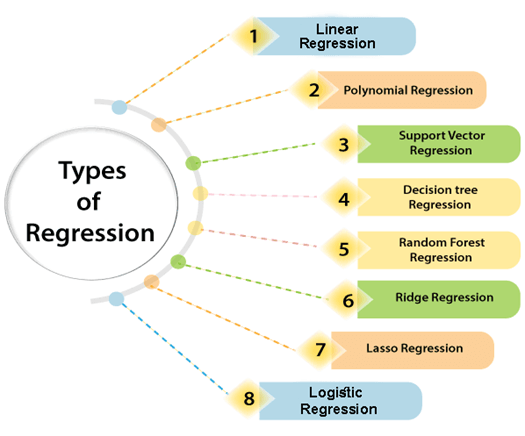

In our case in order to simplify,  we are going to use linear regression model. This model can be represented as a linear combination of features to represent a label, it means a linear equation: It is like a line with an slope and intercept(bias).

$$Y = a*x + b$$

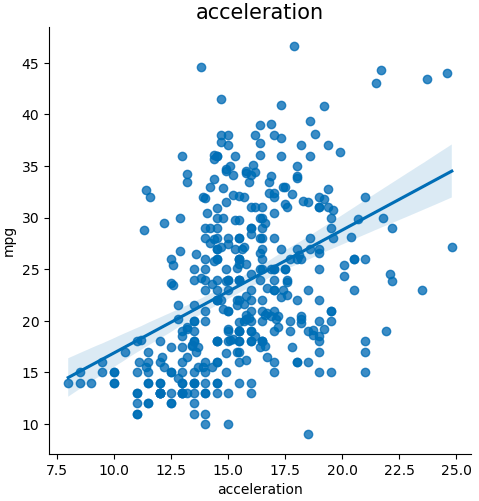

or 

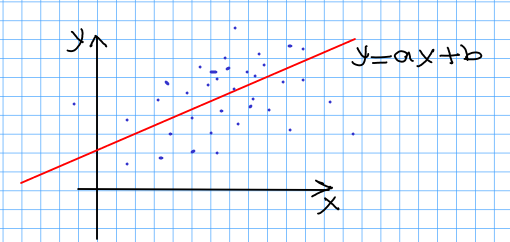

As much slope, the line is more steeped and if there is no slope, the default value would be the interception in y axis. What we want to fit a line to our data in the best way. In our case, we have more than one feature so we can consider a multivariate linear regression (hiperplane of n dimensions). So we can predict label $Y_{pred}$ based on features:

$$Y_{pred} = a_1*x_1 + a_2*x_2 + ... + a_n*X_n + b_0$$

Where:

- The $a_i$ are the weights or slopes. Slope is the measue of how steep is the data distributed on the line or plane.
- The $x_i$ are the features.
- The $b_0$ is the bias. Intercept(Bias) is like a default value of the label when there is no data.
- The $Y_{pred}$ is the prediction.

To dive into more details, we have to delve into mathematical operacions(linear algebra). We can express the formula of Linear Regression in a vector form we will have the following:


$$Y_{pred} = A.X^{T} + B$$

But now we have a problem because how to measure if our prediction is well or not. So we need to add an error variable which will help us to optimize our model.

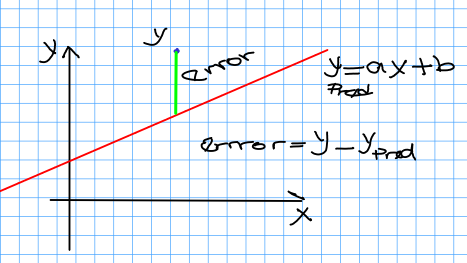

We have the values of features and labels in our data, but we don't know about weights, bias values so our question is how to get these values?. Is there any way or standard procedure to find them? because we can have many lines which could represent our model? In the next picture it can be showed.

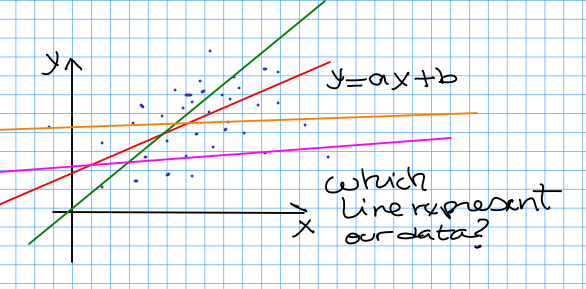

At the end when we think about weights, bias, it means our model, our mathematical representation of the data.


In [ ]:
df.head()

In [ ]:
#df['horsepower']

plot = sns.lmplot(x = 'horsepower', y = "mpg", data = df.where(df['origin'] == 1))
#plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
plt.title('horsepower' + ' vs ' + 'mpg', fontsize = 15)
plt.show()
    

In [ ]:
for i in ["acceleration","weight","displacement"]:
    #plot = sns.lmplot(x = i, y = "mpg", data = df)
    plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i + ' vs ' + 'mpg', fontsize = 15)
    plt.show()

In [ ]:
df.where(df['origin'] == 1)

In [ ]:
for i in ["acceleration","weight","displacement"]:
    plot = sns.lmplot(x = i, y = "mpg", data = df.where(df['origin'] == 1))
    #plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i + ' vs ' + 'mpg', fontsize = 15)
    plt.show()

In [ ]:
for i in ["acceleration","weight","displacement"]:
    plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
    plt.title(i, fontsize = 15)
    plt.show()

# Point 2: How to define the weights? Which algorithm to use?

A linear regression is a line which we wants to fit in the best way to all points(data). In this way, we need to set up an algorithm or procedure to find the weigths and bias. There are many ways to set up this procedure, but in the book of Luis G. Serrano - Machine Learning, mention an intuitive way:

A basic algorithm:

- Input: a point from dataset 
- Output: a line which passes close to the points,  a model which best fit the data
- Procedure:
    1. pick a model with random weigth and bias(It means a randaom line)
    2. repeat many times: 
        - Pick some points as reference
        - Adjust the weigths and bias to improve predictions closer to this point
     3. return a model
    

Now we have to define how to adjust the weights(slope) and bias(intercept). There are many ways to do it. Having in mind one point (r,p) and a random line, here 2 ways to be closer to the point: 1. changing the slope by increasing(rotate counterclockwise) or decreasing(clockwise), 2. changing the intercept by increasing(upward) or decreasing(downward). Combining thses 2 ways, we can create a more complex algorithm:

Adjustment algorithm:

- Input: 
    - a line with weight m, bias b and equation: $y_{pred} = m*x + b$
    - a point (r,p)
    - a small positive value $ \eta $ (learning rate)
- Output: 
    - a line $y_{pred} = m^{'}*x + b^{'}$ which passes close to the point (r,p)
- Procedure:
    - Case 1 - $(y-y_{pred}) > 0 $:
        - $ m^{'} = m + \eta * r $ with this line will rotate counterclockwise
        - $ b^{'} = b + \eta * r $ with this line will traslate up
    - Case 2 - $(y-y_{pred}) < 0 $:
        - $ m^{'} = m - \eta * r $ with this line will rotate clockwise
        - $ b^{'} = b - \eta * r $ with this line will traslate down

Now you can see that we have to repeat this process for all the points and find best weights, bias, it means we have to iterate. Each iteration is called epoch.

Manual?
- Dataset created with small values
- Create algorithn for adjust weights
- Create algorithm for model and epoch
- Output weights

Package sklearn?
- Dataset created with small values
- Split dataset for training and testing
- model =  LinnearRegerssion(dataset_training)
- Output weights

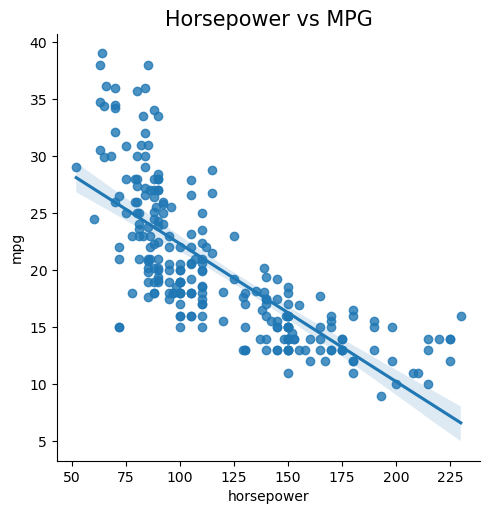

In [303]:
plot = sns.lmplot(x = 'horsepower', y = "mpg", data = df.where(df['origin'] == 1))
#plot = sns.lmplot(x = "mpg", y = i, data = df, hue = 'origin')
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.show()

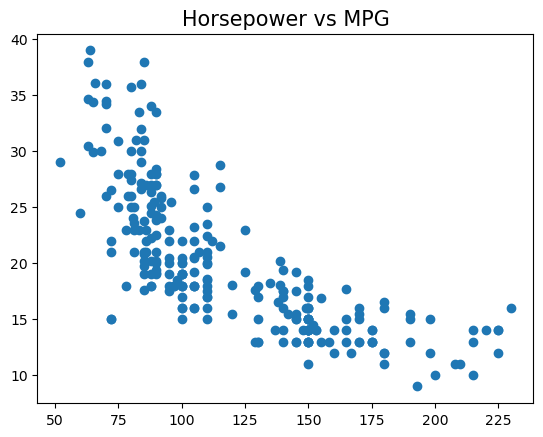

In [304]:
plt.scatter(df['horsepower'].where(df['origin'] == 1), df['mpg'].where(df['origin'] == 1))
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.show()

In [305]:
df_line = df[df['origin'] == 1]
df_line['horsepower'].values

array([130. , 165. , 150. , 150. , 140. , 198. , 220. , 215. , 225. ,
       190. , 170. , 160. , 150. , 225. ,  95. ,  97. ,  85. ,  90. ,
       215. , 200. , 210. , 193. ,  90. ,  81.1, 100. , 105. , 100. ,
        88. , 100. , 165. , 175. , 153. , 150. , 180. , 170. , 175. ,
       110. ,  72. , 100. ,  88. ,  86. ,  70. ,  80. ,  90. ,  86. ,
       165. , 175. , 150. , 153. , 150. , 208. , 155. , 160. , 190. ,
       150. , 130. , 140. , 150. ,  86. ,  80. , 175. , 150. , 145. ,
       137. , 150. , 198. , 150. , 158. , 150. , 215. , 225. , 175. ,
       105. , 100. , 100. ,  88. ,  95. , 150. , 167. , 170. , 180. ,
       100. ,  72. ,  85. , 107. , 145. , 230. , 150. , 180. ,  95. ,
        81.1, 100. , 100. ,  80. ,  75. , 100. , 110. , 105. , 140. ,
       150. , 150. , 140. , 150. ,  75. ,  95. , 105. ,  72. ,  72. ,
       170. , 145. , 150. , 148. , 110. , 105. , 110. ,  95. , 110. ,
       110. , 129. ,  83. , 100. ,  78. ,  97. ,  90. ,  92. ,  79. ,
       140. , 150. ,

In [300]:
df_line = df['horsepower'].where(df['origin'] == 1).values
df_line

array([130. , 165. , 150. , 150. , 140. , 198. , 220. , 215. , 225. ,
       190. , 170. , 160. , 150. , 225. ,   nan,  95. ,  97. ,  85. ,
         nan,   nan,   nan,   nan,   nan,   nan,  90. , 215. , 200. ,
       210. , 193. ,   nan,  90. ,   nan,  81.1, 100. , 105. , 100. ,
        88. , 100. , 165. , 175. , 153. , 150. , 180. , 170. , 175. ,
       110. ,  72. , 100. ,  88. ,  86. ,   nan,   nan,   nan,   nan,
         nan,   nan,  70. ,   nan,  80. ,   nan,  90. ,  86. , 165. ,
       175. , 150. , 153. , 150. , 208. , 155. , 160. , 190. ,   nan,
       150. , 130. , 140. , 150. ,   nan,   nan,   nan,   nan,  86. ,
         nan,   nan,  80. ,   nan, 175. , 150. , 145. , 137. , 150. ,
       198. , 150. , 158. , 150. , 215. , 225. , 175. , 105. , 100. ,
       100. ,  88. ,  95. ,   nan, 150. , 167. , 170. , 180. , 100. ,
         nan,  72. ,   nan,   nan,  85. , 107. ,   nan, 145. , 230. ,
         nan,   nan,   nan,   nan, 150. ,   nan,   nan, 180. ,  95. ,
        81.1, 100. ,

In [306]:
df_line['horsepower'].isnull().values # problem debido a que hay valores NaN

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [307]:
def adjust_weight(weight, bias, r, b, lr):
    label_pred = weight*r + bias
    if b > label_pred:
        weight = weight + lr*r
        bias = bias + lr
        #print(weight, bias, b, label_pred, b-label_pred)
    else:
        weight = weight - lr*r
        bias = bias - lr
        #print(weight, bias, b, label_pred, b-label_pred)
    return weight, bias

In [230]:
np.random.randint(low=0, high=10)

3

In [308]:
def basic_lin_reg(df_line, lr=0.01, epochs = 100):
    weight = np.random.random()
    bias = np.random.random()
    print(weight, bias)
    model = []
    for epoch in range(epochs):
        i = np.random.randint(0, len(df_line['horsepower'])-1)
        r = df_line['horsepower'][i]
        b = df_line['mpg'][i]
        print(weight, bias, r, b, i)
        weight, bias = adjust_weight(weight, bias, r, b, lr)
        model.append({'weight': weight, 'bias':bias})
    return model

In [254]:
mi_lista = [{"a": 1, "b": 2}]
mi_lista.append({"c": 3, "d": 4})

In [255]:
mi_lista.append({"c": 3, "d": 4})

In [256]:
for dic in mi_lista[1].keys():
    print(mi_lista[1][dic])

3
4


In [267]:
r = df_line['horsepower'][0]
b = df_line['mpg'][143]
r,b

(130.0, nan)

In [282]:
df['horsepower'].isnull().values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [269]:
df_line['horsepower'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 398 entries, 0 to 397
Series name: horsepower
Non-Null Count  Dtype  
--------------  -----  
249 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [330]:
model_lr = basic_lin_reg(df, lr=1, epochs = 100)

0.4428167881076782 0.4797926981109769
0.4428167881076782 0.4797926981109769 130.0 17.0 285
-129.55718321189232 -0.5202073018890231 80.0 26.0 130
-49.55718321189232 0.4797926981109769 70.0 32.1 311
20.442816788107677 1.4797926981109768 92.0 28.0 81
-71.55718321189232 0.4797926981109768 90.0 27.0 372
18.442816788107677 1.4797926981109768 68.0 31.5 216
-49.55718321189232 0.4797926981109768 68.0 31.5 216
18.442816788107677 1.4797926981109768 90.0 28.4 305
-71.55718321189232 0.4797926981109768 138.0 16.5 287
66.44281678810768 1.4797926981109768 110.0 16.0 134
-43.55718321189232 0.4797926981109768 71.0 31.9 293
27.442816788107677 1.4797926981109768 150.0 13.0 91
-122.55718321189232 0.4797926981109768 90.0 19.4 257
-32.55718321189232 1.4797926981109768 98.0 22.0 179
65.44281678810768 2.479792698110977 90.0 27.0 372
-24.557183211892323 1.4797926981109768 150.0 17.0 66
125.44281678810768 2.479792698110977 180.0 16.0 229
-54.55718321189232 1.4797926981109768 71.0 31.5 278
16.442816788107677 2.47

In [ ]:
for i in range(len(model_lr)):
    print(i)
    for dic in model_lr[i].keys():
        print(model_lr[i][dic])
        

In [331]:
model_lr[0]['weight'], model_lr[0]['bias']

(-129.55718321189232, -0.5202073018890231)

In [334]:
x = [float(i) for i in range(len(model_lr))]
y_pred = [ model_lr[0]['weight']*i + model_lr[0]['bias'] for i in x]

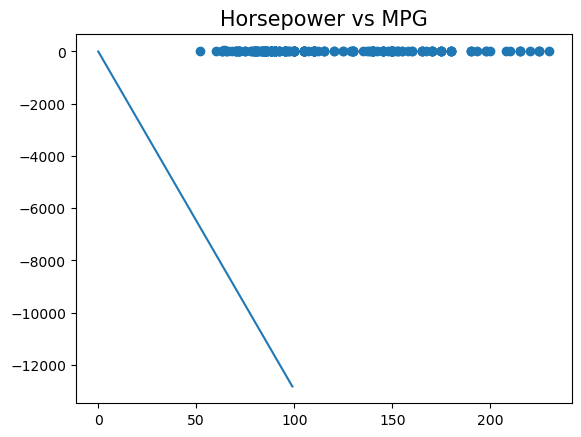

In [335]:
plt.scatter(df['horsepower'].where(df['origin'] == 1), df['mpg'].where(df['origin'] == 1))
plt.plot(x, y_pred)
plt.title('Horsepower' + ' vs ' + 'MPG', fontsize = 15)
plt.show()

# Point 3: How to measure/evaluate if our algorithm is the best? How to get the best weigths?

To measure we need to know the diference about real value and predicted value. So Error Function is used to measure our model. Error function is also called Loss Function or Cost Function. There is 2 ways to be defined: Absolute error and Square error. 

1. Absolute Error means to take the absolute value of the difference between the real value and the predicted value. it will help us to measure which line or model is more closer to all points. MAE. 
2. Square Error take the square of the difference between the real value and the predicted value. MSE.
3. Root Mean Square Error is used to have the same units as the problem variables have. So it give us a better understanding how much error has our predicted values to the real values.

Square Error is used more than Absolute Error because it has a better form to be used in formulas like derivation, intergrals.




# Point 4: How to optimize the algorithm?

One way to optimize is to use Gradient Descent algorithm. This algorithm tries to minimize the error. This process does not always find the minimum value of  the function, but instead something very close it. How does gradient descent work?. 

Gradient descent works like to descent from the top of a mountain:
1. We have to look every side to find  a direction which we can descent the most. 
2. We have to take small steps which it can make sure descent the most. 
3. Repeat this process many times until be in the bottom.

One way to measure how the mode is going to go is the height of the error. So good models will ave small error and bad modes will have high errors. Measuring the error, we can realize that we do not need to execute many iteration (epoch). We can do some iteration and finally find the best model.

Gradient Descent has 3 versions: 
1. When evaluate 1 point: Stochastic Gradient Descent.
2. when evaluate mini-batch points: Mini-batch Gradient Descent
3. When use the whole dataset: Batch Gradient Descent

Parameters and Hyperparameters are important concepts in Machine Learning.  
1. Parameters are weights and bias. In general, they are any quantity that the model create or modify during the training process. 
2. Hyperparameters are learning rate, epochs, degree of polynomial regression model. In general, they are any quantity you set before the training process.




# Point 5: How to use the model?

# References
- dataset source: https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
- https://www.kaggle.com/code/merturper/vehicle-fuel-consumption-eda-stats-ml
- https://www.kaggle.com/code/filizesenkaya/car-eda